## Do More Airbnb listings implies Higher House Price in Paris?
#### What Changed After the 2015 Regulation?

## Introduction

Paris, France has long stood as one of the world’s most celebrated tourist destinations. Known as La Ville Lumière—the City of Light—it attracts millions of visitors each year to iconic landmarks such as the Eiffel Tower and the Louvre. Beyond its monuments, Paris captivates with its unmistakable je ne sais quoi: charming cafés, elegant Haussmann architecture, vibrant shopping districts, and a cultural richness that feels timeless. One of the city’s greatest strengths is its ability to constantly reinvent itself—every visit offers something new. Quite simply, Paris is always a good idea.

At the same time, Airbnb, Inc., an American technology company, has transformed the global accommodation market through its online marketplace for short- and long-term stays, experiences, and services. Operating as a platform intermediary, Airbnb connects hosts and guests while earning a commission on each booking. Over the years, Paris has emerged as one of Airbnb’s largest and most dynamic rental markets worldwide.

Understanding Airbnb listing prices in a city with such intense and sustained tourist demand is therefore crucial. Pricing dynamics affect multiple stakeholders: hosts seeking profitability, tourists making budget decisions, policymakers concerned with housing affordability, and investors evaluating market sustainability. Gaining insight into how listing prices evolve allows for more informed economic and strategic decisions.

This project addresses a central business and policy question: Has the growth of Airbnb listings contributed to changes in property pricing dynamics in Paris? Furthermore, what was the impact of the 2015 regulation on market prices? 

The following analysis explores these questions through data-driven evidence to uncover the relationship between platform expansion, regulation, and pricing trends in Paris

**Can you spot any major differences in the Airbnb market between cities?**

**Which attributes have the biggest influence in price?**

**Are you able to identify any trends or seasonality in the review data?**

**Which city offers a better value for travel?**

The Airbnb data for this analysis contains 250,000+ listings in 10 major cities, including information about hosts, pricing, location, and room type, along with over 5 million historical reviews.

 **NOTE: Prices are in local currency**
 
 **Data Source: Inside Airbnb*


In [1]:
# Loading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset

data =pd.read_csv(r"C:\Users\hp\Desktop\Maven Analytic\Airbnb+Data\Airbnb Data\Listings.csv", encoding ='latin')
data.head()


,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


**Let's do Quality Accurance on the Paris listings data: check for missing values, and calculate the minimum, maximum, and average for each numeric field**

In [3]:
# Let's views the columns
data.columns

Index(['listing_id', 'name', 'host_id', 'host_since', 'host_location',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'district', 'city', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bedrooms', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable'],
      dtype='object')

In [4]:
# Picking a few columns for the analysis and filtering only Paris record
data2 =data.query(" city == 'Paris'").loc[:,['host_since', 'neighbourhood', 'city', 'accommodates', 'property_type', 'price']]
data2.head()

,host_since,neighbourhood,city,accommodates,property_type,price
0,2011-12-03,Buttes-Montmartre,Paris,2,Entire apartment,53
1,2013-11-29,Buttes-Montmartre,Paris,2,Entire apartment,120
2,2014-07-31,Elysee,Paris,2,Entire apartment,89
3,2013-12-17,Vaugirard,Paris,2,Entire apartment,58
4,2014-12-14,Passy,Paris,2,Entire apartment,60


In [5]:
# Let's look at the information of the dataset
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   host_since     64657 non-null  object
 1   neighbourhood  64690 non-null  object
 2   city           64690 non-null  object
 3   accommodates   64690 non-null  int64 
 4   property_type  64690 non-null  object
 5   price          64690 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 3.5+ MB


In [6]:
data2.isna().sum()

host_since       33
neighbourhood     0
city              0
accommodates      0
property_type     0
price             0
dtype: int64

In [7]:
data2.describe()

,accommodates,price
count,64690.000000,64690.000000
mean,3.037997,113.096445
std,1.588766,214.433668
min,0.000000,0.000000
25%,2.000000,59.000000
50%,2.000000,80.000000
75%,4.000000,120.000000
max,16.000000,12000.000000


I think there is an issue with summary statistics, for us to have 0 accommodates which leads to 0 price. Is it possible for someone to list their house on Airbnb for a price, or maybe there is an error while listing the house. 

So we can filter out part out or we can leave, I guess it won't skew our analysis.

**From the statistics, the average price is about 133€ with a maximum price of 12000€, and the median price is 120€. The highest listing price is 12000€.**


In [8]:
data2.describe(include ='object')

,host_since,neighbourhood,city,property_type
count,64657,64690,64690,64690
unique,3854,20,1,67
top,2019-09-02,Buttes-Montmartre,Paris,Entire apartment
freq,634,7237,64690,51581


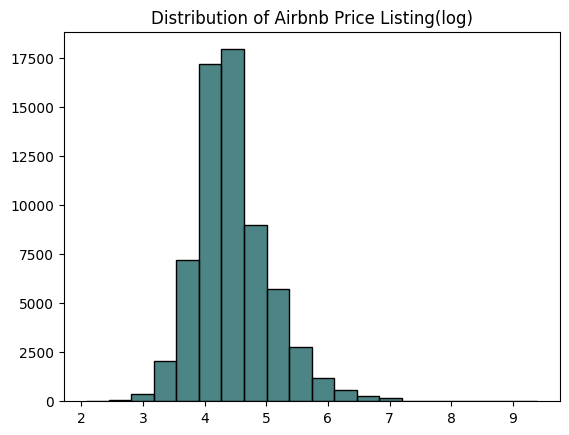

In [9]:
sns.histplot(data =data2, x = np.log(data2['price']), bins =20, color = '#115b5c')
plt.title('Distribution of Airbnb Price Listing(log)')
plt.xlabel('')
plt.ylabel('')

plt.savefig(r"C:\Users\hp\Desktop\Projects\Python\Fiscal Performance Project\100.png",dpi=300, bbox_inches="tight")
plt.show()

In [10]:
# Let's cast the date into datetime
data2['host_since'] =pd.to_datetime(data2['host_since'])

In [11]:
#  let's create paris_listings_neighbourhood table that groups Paris listings by 'neighbourhood' and calculates the mean price (sorted low to high)
paris_listings_neighbourhood = (data2.groupby('neighbourhood')
    .agg({'price':'mean'}).sort_values(by ='price', ascending = False))
paris_listings_neighbourhood.tail()

,price
neighbourhood,
Popincourt,90.559459
Reuilly,89.058402
Buttes-Montmartre,87.209479
Buttes-Chaumont,82.690182
Menilmontant,74.942257


 **Let's create a table named paris_listings_accomodations and filter down to the most expensive neighborhood, group by the ‘accommodations’ column, and add the mean price for each value of ‘accommodates’ (sorted low to high)**


In [12]:
paris_listings_accomodations = (data2.query("neighbourhood == 'Elysee'")
    .groupby('accommodates')
    .agg({'price':'mean'}))

paris_listings_accomodations.head()

,price
accommodates,
0,0.000000
1,79.522222
2,155.103352
3,152.828767
4,212.096070


**Let's createreate a table called paris listings over time grouped by the ‘host_since’ year, and calculate the average price and count of rows representing the number of new hosts. This is will help us to see how entering of new hosts impacted the listing prices.**

**We can also see how the pricing model has evolved over time**

In [13]:
paris_listings_over_time =(data2.set_index('host_since').resample('Y')
    .agg({'price':'mean', 'neighbourhood':'count'})
    )
paris_listings_over_time .head()

,price,neighbourhood
host_since,,
2008-12-31,77.750000,4
2009-12-31,159.641509,106
2010-12-31,125.031250,416
2011-12-31,124.828230,1339
2012-12-31,111.578615,4592


**Let's look at the performance of property type by the most frequently demanded house type. This answers the question of which house type cost the most and the least**

In [14]:
data2['property_type'].value_counts().reset_index()

,property_type,count
0,Entire apartment,51581
1,Private room in apartment,5529
2,Entire condominium,1789
3,Room in boutique hotel,1743
4,Entire loft,1101
...,...,...
62,Shared room in guest suite,1
63,Island,1
64,Entire chalet,1
65,Camper/RV,1


### Visualize the data and summarize findings
My objective is to build visuals to show the number of new hosts by year, overall average price by year and neighborhood, and average price for various types of listings in Paris' most expensive neighborhood.

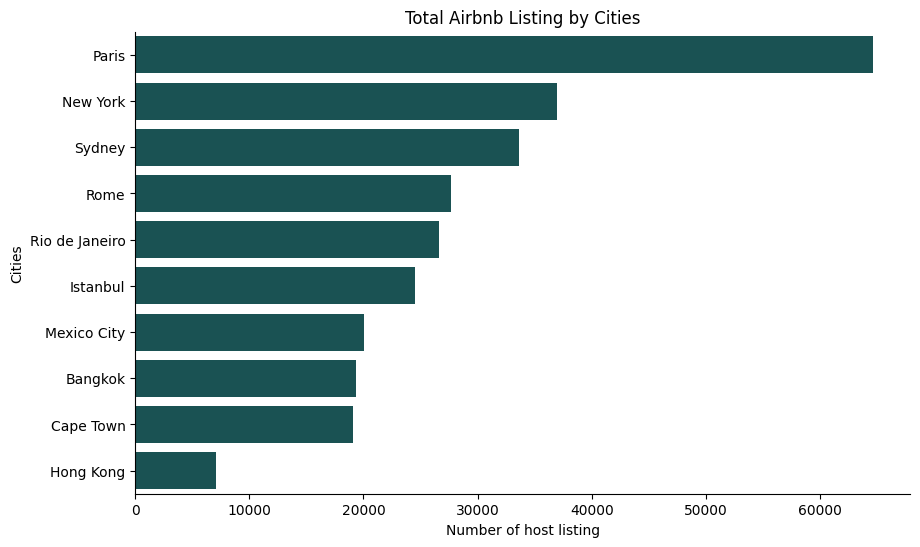

In [15]:
plt.figure(figsize =(10,6))

mk = (data.groupby("city")
    .agg({"host_total_listings_count":"count"})
    .sort_values(by ='host_total_listings_count', ascending =False)
           )

sns.barplot(data =mk, x ='host_total_listings_count',  y= 'city', color ='#115b5c')
plt.title("Total Airbnb Listing by Cities")
plt.xlabel("Number of host listing")
plt.ylabel("Cities")
sns.despine()

plt.savefig(r"C:\Users\hp\Desktop\Projects\Python\Fiscal Performance Project\101.png",dpi=300, bbox_inches="tight")
plt.show()

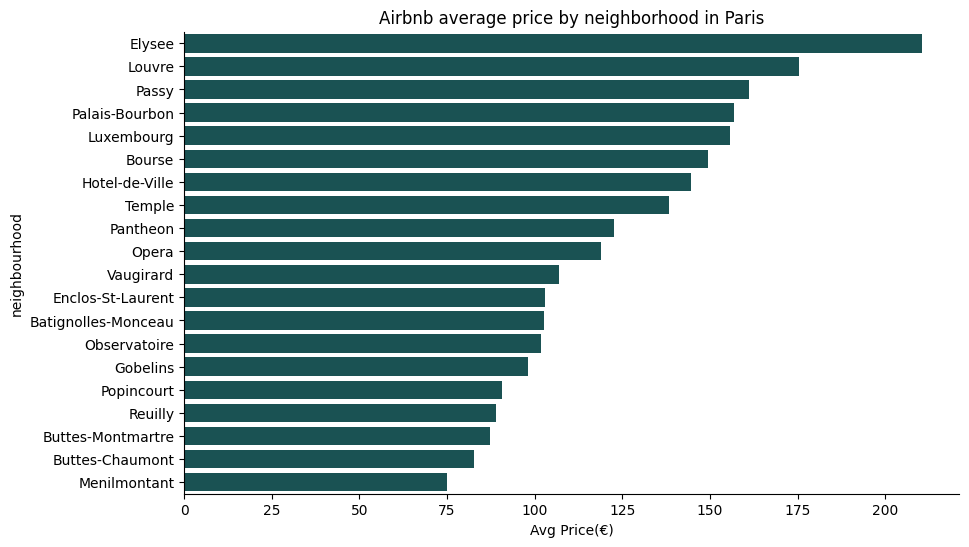

In [16]:
# Let's create a horizontal bar chart of the average price by neighborhood in Paris

plt.figure(figsize =(10,6))
sns.barplot(data =paris_listings_neighbourhood, 
            y = 'neighbourhood',
            x = 'price',
           color ='#115b5c')
plt.title('Airbnb average price by neighborhood in Paris')
plt.xlabel('Avg Price(€)')

sns.despine()
plt.savefig(r"C:\Users\hp\Desktop\Projects\Python\Fiscal Performance Project\102.png",dpi=300, bbox_inches="tight")
plt.show()

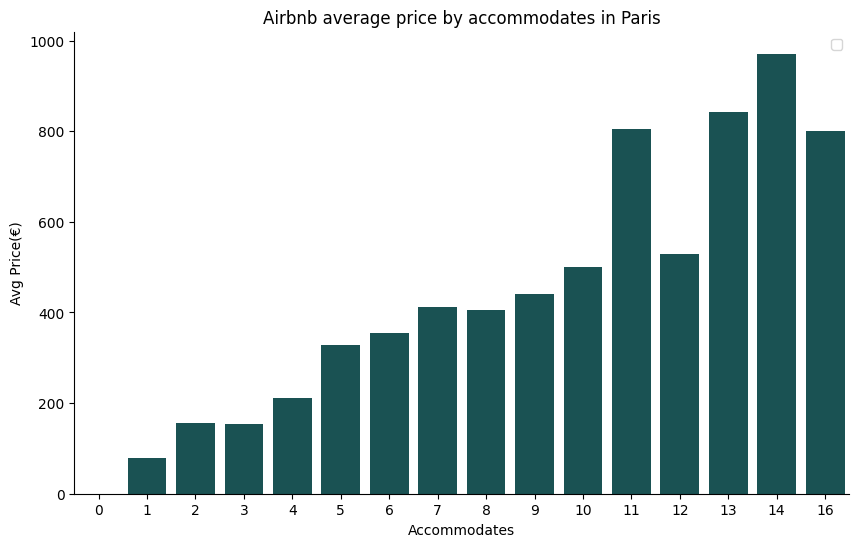

In [17]:
# Let's create a horizontal bar chart of the average price by ‘accommodates’ in Paris’ most expensive neighborhood

plt.figure(figsize =(10,6))
sns.barplot(data =paris_listings_accomodations, 
            x = 'accommodates',
            y = 'price',
           color ='#115b5c')
plt.title('Airbnb average price by accommodates in Paris')
plt.ylabel('Avg Price(€)')
plt.xlabel('Accommodates')
plt.legend('')


sns.despine()
plt.savefig(r"C:\Users\hp\Desktop\Projects\Python\Fiscal Performance Project\103.png",dpi=300, bbox_inches="tight")
plt.show()

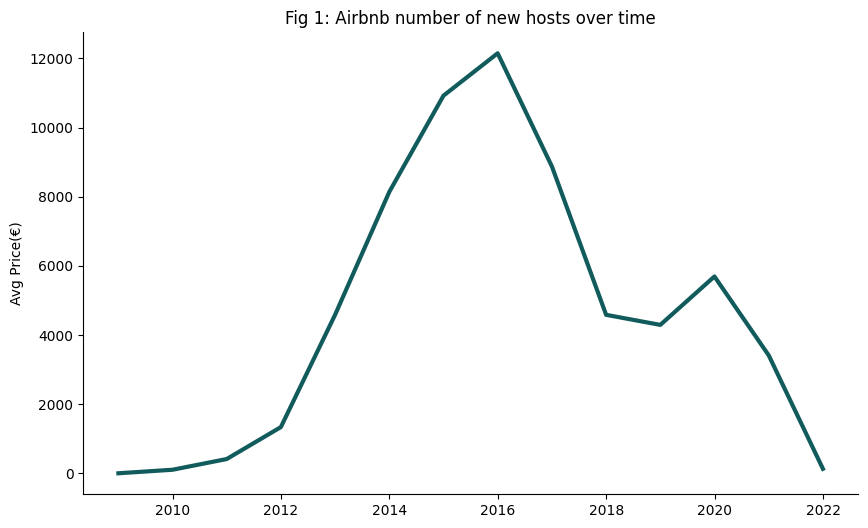

In [18]:
# Let look at the analysis, a two line charts, one showing the count of new hosts over time, and one showing average price

fig, ax =plt.subplots(figsize =(10,6))
ax.plot(paris_listings_over_time.index,
       paris_listings_over_time['neighbourhood'],
       linewidth =3,
       c ='#115b5c')
ax.set_title('Fig 1: Airbnb number of new hosts over time')
ax.set_ylabel('Avg Price(€)')


sns.despine()

plt.savefig(r"C:\Users\hp\Desktop\Projects\Python\Fiscal Performance Project\104.png",dpi=300, bbox_inches="tight")
plt.show()

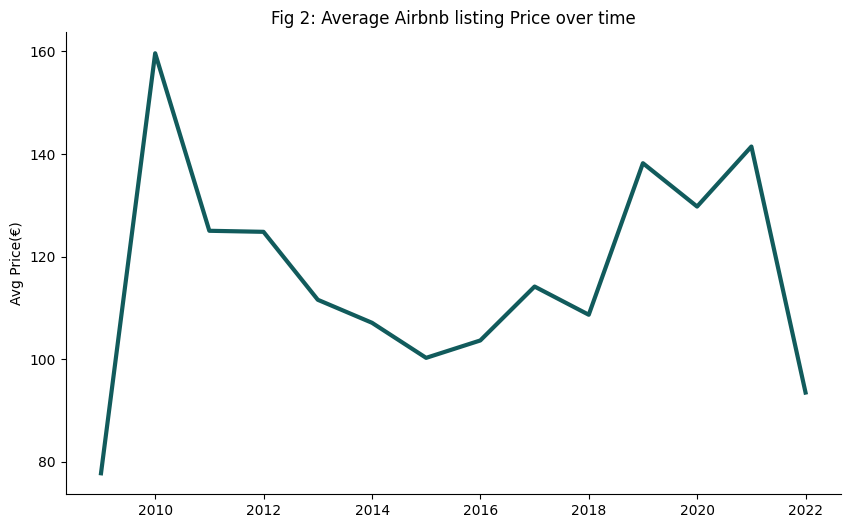

In [19]:
# Let look at the analysis, a two line charts, one showing the count of new hosts over time, and one showing average price

fig, ax =plt.subplots(figsize =(10,6))
ax.plot(paris_listings_over_time.index,
       paris_listings_over_time['price'],
       linewidth =3,
       c ='#115b5c')
ax.set_title('Fig 2: Average Airbnb listing Price over time')
ax.set_ylabel('Avg Price(€)')

ax.spines[['right', 'top']].set_visible(False)
# sns.despine()

plt.savefig(r"C:\Users\hp\Desktop\Projects\Python\Fiscal Performance Project\105.png",dpi=300, bbox_inches="tight")
plt.show()

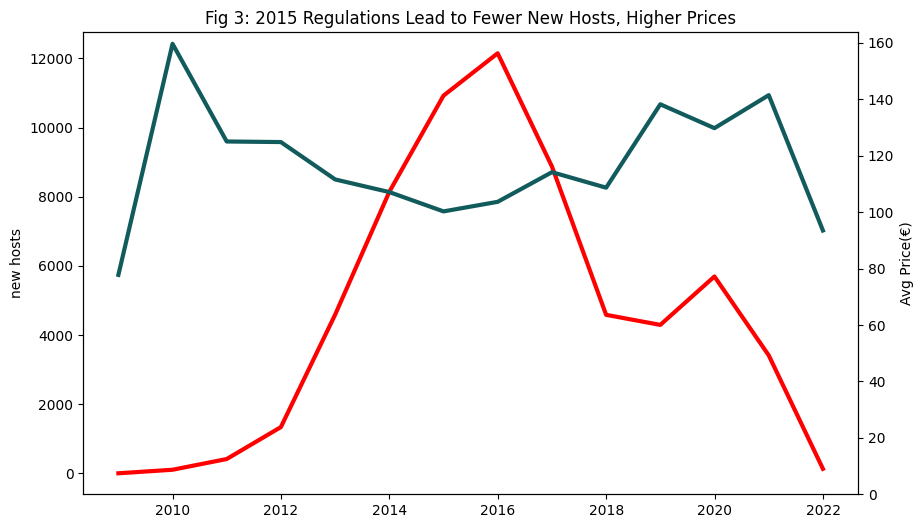

In [20]:
fig, ax =plt.subplots(figsize =(10,6))
ax.plot(paris_listings_over_time.index,
       paris_listings_over_time['neighbourhood'],
       linewidth =3,
       c ='red')
ax.set_title('Fig 3: 2015 Regulations Lead to Fewer New Hosts, Higher Prices')
ax.set_ylabel('new hosts')


ax2 =ax.twinx()
ax2.plot(paris_listings_over_time.index,
       paris_listings_over_time['price'],
       linewidth =3,
       c ='#115b5c')
ax2.set_ylabel('Avg Price(€)')
ax2.set_ylim(0)

plt.savefig(r"C:\Users\hp\Desktop\Projects\Python\Fiscal Performance Project\106.png",dpi=300, bbox_inches="tight")
plt.show()

In [21]:
propty = data2['property_type'].value_counts().reset_index().head(10)

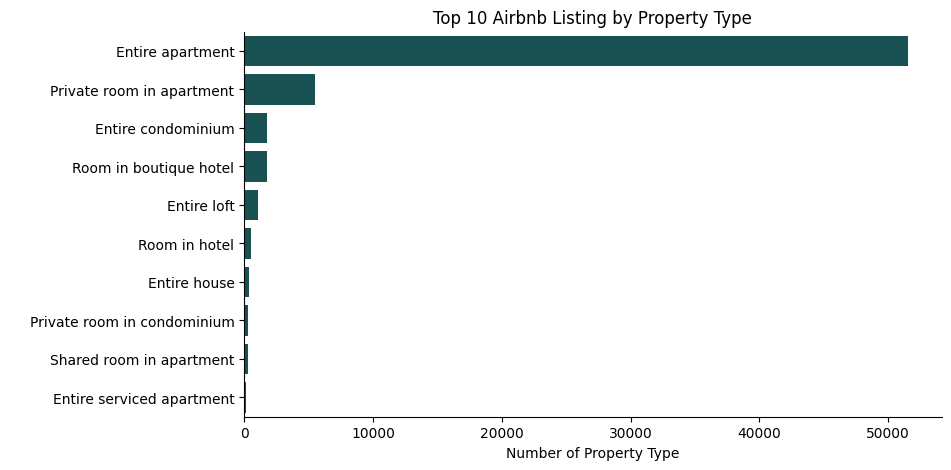

In [22]:
plt.figure(figsize =(9,5))
sns.barplot(data =propty, y ='property_type', x= 'count', color ='#115b5c')
plt.title("Top 10 Airbnb Listing by Property Type")
plt.xlabel("Number of Property Type")
plt.ylabel(" ")

sns.despine()

plt.savefig(r"C:\Users\hp\Desktop\Projects\Python\Fiscal Performance Project\107.png",dpi=300, bbox_inches="tight")
plt.show()